In [737]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  mean_absolute_percentage_error, r2_score

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


import nevergrad as ng

from scipy.stats.mstats import winsorize

import statsmodels.api as sm
import statsmodels.tsa.api as tsa
from statsmodels.stats.outliers_influence import variance_inflation_factor

from statsmodels.tsa.seasonal import seasonal_decompose


# 1. EDA

**Read dataframes**

In [738]:
df_week = pd.read_csv('input/data_weekly.csv')
df_week.head(5)

,Date,investment_tv,investment_radio,investment_press,investment_banners,investment_online,stores_opened,economy_index,investment_competition,public_holidays,brand_knowledge,christmas_dummy,weather_index,investment_competition_1,investment_competition_2,precipitation_index,competitor_recognition_1,competitor_recognition_2,YearWeek,sales
0,01.10.2020,9.813096e+05,0.0,236646.24270,0.0000,871248.6945,186,22777.0,64817.0000,0,0.724231,0,71.050000,4.469290e+06,1.646746e+07,29.957143,0.428392,0.439821,201740,28225189.15
1,08.10.2020,1.204436e+06,0.0,492336.78720,0.0000,780996.4369,186,22905.3,290340.0000,0,0.810316,0,54.744286,3.424972e+06,9.855486e+06,7.314286,0.396890,0.511645,201741,33173110.86
2,15.10.2020,1.321570e+06,0.0,291885.33780,0.0000,932173.8794,186,23328.8,824941.0000,0,0.778179,0,54.311429,1.502713e+07,1.812631e+07,9.500000,0.440410,0.394800,201742,30504393.42
3,22.10.2020,2.155215e+05,0.0,110500.83200,0.0000,683081.4701,186,23485.3,591291.0000,1,0.804275,0,68.302857,1.147109e+07,1.579170e+07,30.485714,0.404397,0.413794,201743,30335675.45
4,29.10.2020,9.799192e+04,0.0,58135.35929,175435.8015,539848.5232,186,23557.1,554888.8674,0,0.817915,0,63.864286,1.876094e+07,2.324122e+07,19.728571,0.500315,0.452294,201744,25670890.36


In [739]:
df_week.tail(5)

,Date,investment_tv,investment_radio,investment_press,investment_banners,investment_online,stores_opened,economy_index,investment_competition,public_holidays,brand_knowledge,christmas_dummy,weather_index,investment_competition_1,investment_competition_2,precipitation_index,competitor_recognition_1,competitor_recognition_2,YearWeek,sales
112,24.11.2022,0.000,0.0,0.0,26600.5635,2.018774e+06,142,28175.0,17469024.98,0,0.709503,0,65.965714,8383346.483,22385049.65,19.100000,0.552689,0.471849,201948,23974410.26
113,01.12.2022,0.000,0.0,0.0,0.0000,9.954599e+05,142,28109.8,12131550.24,0,0.778967,0,67.607143,3788887.598,28046114.92,11.242857,0.501246,0.500979,201949,20884279.92
114,08.12.2022,0.000,0.0,0.0,0.0000,1.652220e+06,142,28290.7,20624785.51,0,0.721600,0,71.281429,5688529.991,27570241.08,13.071429,0.493944,0.444787,201950,21475590.81
115,15.12.2022,0.000,0.0,0.0,0.0000,9.946260e+05,142,28608.6,20449414.88,0,0.795736,0,63.042857,4501809.765,28072433.02,11.057143,0.524342,0.505004,201951,23863407.52
116,22.12.2022,1421815.694,0.0,0.0,0.0000,7.035735e+05,142,28701.7,11604843.10,3,0.711990,1,73.668571,1067903.548,22751932.87,23.228571,0.523796,0.505997,201952,15043045.07


In [740]:
df_week.dtypes

Date                         object
investment_tv               float64
investment_radio            float64
investment_press            float64
investment_banners          float64
investment_online           float64
stores_opened                 int64
economy_index               float64
investment_competition      float64
public_holidays               int64
brand_knowledge             float64
christmas_dummy               int64
weather_index               float64
investment_competition_1    float64
investment_competition_2    float64
precipitation_index         float64
competitor_recognition_1    float64
competitor_recognition_2    float64
YearWeek                      int64
sales                       float64
dtype: object

In [741]:
# check for NaN
df_week.isna().sum()

Date                        0
investment_tv               0
investment_radio            0
investment_press            0
investment_banners          0
investment_online           0
stores_opened               0
economy_index               0
investment_competition      0
public_holidays             0
brand_knowledge             0
christmas_dummy             0
weather_index               0
investment_competition_1    0
investment_competition_2    0
precipitation_index         0
competitor_recognition_1    0
competitor_recognition_2    0
YearWeek                    0
sales                       0
dtype: int64

In [742]:
# Convert date into datetime
df_week['Date'] = pd.to_datetime(df_week['Date'], format='%d.%m.%Y')
df_week.head(3)

,Date,investment_tv,investment_radio,investment_press,investment_banners,investment_online,stores_opened,economy_index,investment_competition,public_holidays,brand_knowledge,christmas_dummy,weather_index,investment_competition_1,investment_competition_2,precipitation_index,competitor_recognition_1,competitor_recognition_2,YearWeek,sales
0,2020-10-01,981309.627,0.0,236646.2427,0.0,871248.6945,186,22777.0,64817.0,0,0.724231,0,71.050000,4.469290e+06,1.646746e+07,29.957143,0.428392,0.439821,201740,28225189.15
1,2020-10-08,1204435.829,0.0,492336.7872,0.0,780996.4369,186,22905.3,290340.0,0,0.810316,0,54.744286,3.424972e+06,9.855486e+06,7.314286,0.396890,0.511645,201741,33173110.86
2,2020-10-15,1321570.322,0.0,291885.3378,0.0,932173.8794,186,23328.8,824941.0,0,0.778179,0,54.311429,1.502713e+07,1.812631e+07,9.500000,0.440410,0.394800,201742,30504393.42


**Charts functions**

In [743]:
def line_plot_secondary_axis_px(df, x_col_name, y1_col_name, y2_col_name):
    # Create figure with secondary y-axis
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    # Add traces
    fig.add_trace(
        go.Scatter(x=df[x_col_name], y=df[y1_col_name], name=y1_col_name),
        secondary_y=False,
    )

    fig.add_trace(
        go.Scatter(x=df[x_col_name], y=df[y2_col_name], name=y2_col_name),
        secondary_y=True,
    )

    # Add figure title
    fig.update_layout(
        title_text=f'{y1_col_name} vs {y2_col_name}'
    )

    # Set x-axis title
    fig.update_xaxes(title_text=x_col_name)

    # Set y-axes titles
    fig.update_yaxes(title_text=f"<b> {y1_col_name} </b> ", secondary_y=False)
    fig.update_yaxes(title_text=f"<b> {y2_col_name} </b> ", secondary_y=True)

    # Set the size of the subplot
    fig.update_layout(height=600, width=1200)

    fig.show()

In [744]:
def line_plot_px(df, x_col_name, y_col_name, x_label, y_label, title):

    fig = px.line(  df, 
                    x=x_col_name, 
                    y=y_col_name, 
                    height=600,
                    width=1200, 
                    title=title,
                    )

    fig.update_layout(  yaxis_title=y_label,
                        xaxis_title=x_label,
                        )
    fig.show()

In [745]:
def scatter_polynomial(df, degree, x_col_name, y_col_name):

    # Scatter plot using Plotly Express
    fig = px.scatter(df, 
                    x=x_col_name, 
                    y=y_col_name,
                    height=600, 
                    width=1000, 
                    title=f'{y_col_name} vs {x_col_name}')

    # Polynomial fit
    coefficients = np.polyfit(df[x_col_name], df[y_col_name], degree)
    poly_fit = np.poly1d(coefficients)

    # Create trendline data
    x_fit = np.linspace(df[x_col_name].min(), df[x_col_name].max(), 100)
    y_fit = poly_fit(x_fit)

    # Add trendline to the figure
    fig.add_trace(go.Scatter(x=x_fit, y=y_fit, mode='lines', name=f'Polynomial fit - degree {degree}'))

    # Show the figure
    fig.show()

In [746]:
def scatter_linear(df, x_col_name, y_col_name):
    fig = px.scatter(df,
                    x=x_col_name, 
                    y=y_col_name,
                    height=600, 
                    width=1200, 
                    title=f'{y_col_name} vs {x_col_name}',
                    trendline='ols',
                    trendline_color_override="red"
                    )
    fig.show()

In [747]:
#function

def decompose(data: pd.DataFrame, column_name: str, period: int, title: str, model_type: str):
   
    # Perform seasonal decomposition
    result = seasonal_decompose(data[column_name], model=model_type, period=period)  # Adjust the period as needed

    # Plot the original time series
    plt.figure(figsize=(10, 8))

    # Original Time Series
    plt.subplot(4, 1, 1)
    plt.plot(data[column_name], label='Original Time Series')
    plt.legend()
    plt.title(title + '-' + model_type, fontsize=16)

    # Trend Component
    plt.subplot(4, 1, 2)
    plt.plot(result.trend, label='Trend', color='red')
    plt.legend()


    # Seasonal Component
    plt.subplot(4, 1, 3)
    plt.plot(result.seasonal, label='Seasonal', color='green')
    plt.legend()
  

    # Residuals
    plt.subplot(4, 1, 4)
    plt.plot(result.resid, label='Residuals', color='purple')
    plt.legend()

    plt.tight_layout()
    plt.show()

**Decomposition of sales data**

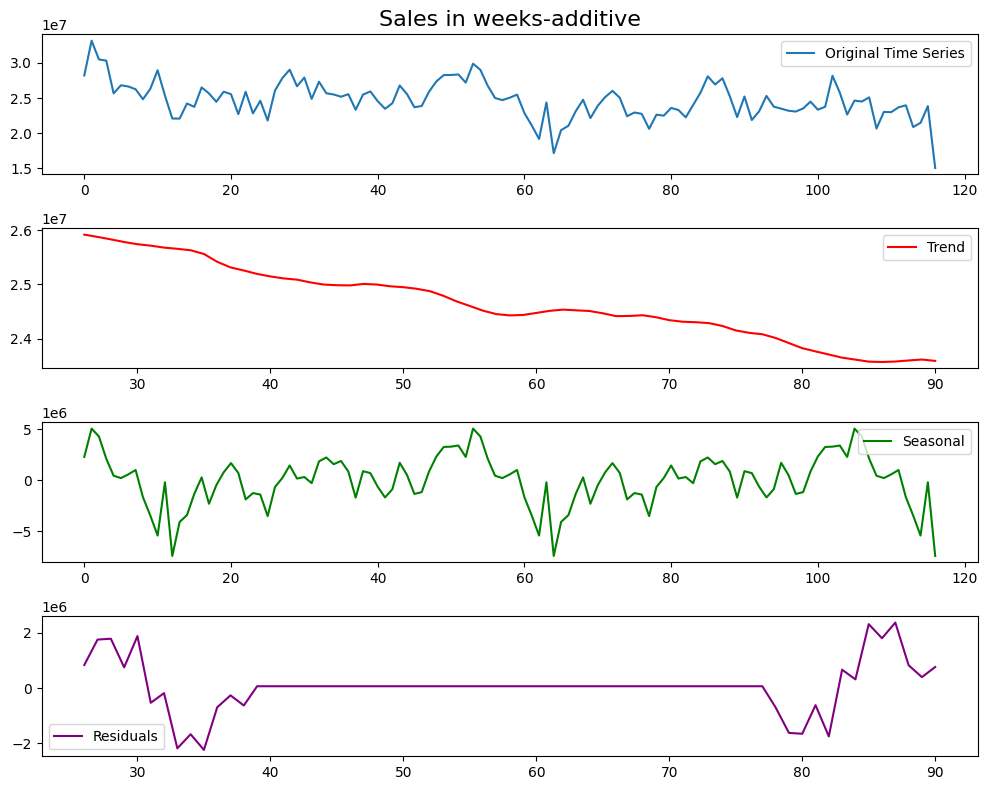

In [748]:
#call the function
decompose(df_week, 
          column_name='sales', 
          period=52, 
          title='Sales in weeks', 
          model_type='additive'
          )

**Opened stores**

In [749]:
line_plot_secondary_axis_px(df=df_week,
                            x_col_name='Date', 
                            y1_col_name='sales', 
                            y2_col_name='stores_opened'
                            )

**Investment comparison**

In [750]:
line_plot_px(df = df_week, 
             title = 'Kinds of investments',
             x_col_name = 'Date', 
             y_col_name = ['investment_tv', 'investment_radio', 'investment_press', 'investment_banners', 'investment_online'],
             x_label = 'date-weeks', 
             y_label = 'money [CZK]'
             )

**TV investments**

In [751]:
scatter_polynomial(df=df_week, 
                   x_col_name='investment_tv', 
                   y_col_name='sales', 
                   degree=1
                   )

**Radio investments**

In [752]:
scatter_polynomial(df=df_week, 
                   x_col_name='investment_radio', 
                   y_col_name='sales', 
                   degree=1
                   )

**Banners**

In [753]:
scatter_polynomial(df=df_week, 
                   x_col_name='investment_banners', 
                   y_col_name='sales', 
                   degree=1
                   )

In [754]:
scatter_polynomial(df=df_week, 
                   x_col_name='investment_banners', 
                   y_col_name='sales', 
                   degree=2
                   )

**Press**

In [755]:
scatter_polynomial(df=df_week, 
                   x_col_name='investment_press', 
                   y_col_name='sales', 
                   degree=2
                   )

In [756]:
scatter_polynomial(df=df_week, 
                   x_col_name='investment_online', 
                   y_col_name='sales', 
                   degree=3
                   )

In [757]:
# Check for outliers
fig = px.box(df_week, y='investment_online', width=400, height=600)
fig.show()

In [758]:
# Windsorize outliers value - certain percentage of the highest outliers are replaced by the closest highest values present in the dataset
df_week['investment_online_edit'] = winsorize(df_week['investment_online'], (0.01,0.01))

scatter_polynomial(df=df_week, 
                   x_col_name='investment_online_edit', 
                   y_col_name='sales', 
                   degree=2
                   )

**EDA-conclusions**

In [759]:
''' 
CONCLUSION:
    - After decomposition of the sales data - we can see that sales exhibits trend and seasonality. 
        - Considering many features as well - model like SARIMAX could be a good choice in this case
        - Because I want to keep a good interpretability and simplicity I will not take the trend and seasonality into account

    - The highest investments are in TV then in online sector and press, the lowest are in a radio, the constant investments are in online sector.

    - Scatter plot 'Sales vs investment-TV' shows high investments with ralivelly low slope 
    
    - Scatter plot 'Sales vs investment-ONLINE' - shows a big outlier 
        - I kept this outlier unchanged (I tried to replace it by the highest neighbouring value via windsorizing - led to better efficiency)
        - in terms of including diminishing return - the polynomial approximation of the third degree would be a better option

    - Scatter plot 'Sales vs investment-RADIO' shows just a few datapoints. There is a linear relationship with sales.

    - Scatter plot 'Sales vs investment-PRESS' nicely shows dimnishing point for the investments (polynom of the second degree)

    - Scatter plot 'Sales vs investment-BANNERS' shows: 
        - that polynomial approximation would be possible (initial investment is negative then it switches to positive)
        - linear relationship with sales is also possible

'''

" \nCONCLUSION:\n    - After decomposition of the sales data - we can see that sales exhibits trend and seasonality. \n        - Considering many features as well - model like SARIMAX could be a good choice in this case\n        - Because I want to keep a good interpretability and simplicity I will not take the trend and seasonality into account\n\n    - The highest investments are in TV then in online sector and press, the lowest are in a radio, the constant investments are in online sector.\n\n    - Scatter plot 'Sales vs investment-TV' shows high investments with ralivelly low slope \n    \n    - Scatter plot 'Sales vs investment-ONLINE' - shows a big outlier \n        - I kept this outlier unchanged (I tried to replace it by the highest neighbouring value via windsorizing - led to better efficiency)\n        - in terms of including diminishing return - the polynomial approximation of the third degree would be a better option\n\n    - Scatter plot 'Sales vs investment-RADIO' shows j

# 2. Merging monthly data

In [760]:
# read data
df_month = pd.read_csv('input/data_monthly.csv')
df_month.head(5)

,Date,unemployment,tourists,gdp,confidence
0,01.01.2020,5.290542,549816,1.408679,115.319086
1,01.02.2020,5.143808,561622,1.408679,113.495436
2,01.03.2020,4.789755,696325,1.408679,114.031803
3,01.04.2020,4.388351,867699,2.443518,113.709983
4,01.05.2020,4.117193,941760,2.443518,113.709983


In [761]:
# Check types 
df_month.dtypes

Date             object
unemployment    float64
tourists          int64
gdp             float64
confidence      float64
dtype: object

In [762]:
# Convert dates
df_month['Date'] = pd.to_datetime(df_month['Date'], format='%d.%m.%Y')
df_month.head(5)

,Date,unemployment,tourists,gdp,confidence
0,2020-01-01,5.290542,549816,1.408679,115.319086
1,2020-02-01,5.143808,561622,1.408679,113.495436
2,2020-03-01,4.789755,696325,1.408679,114.031803
3,2020-04-01,4.388351,867699,2.443518,113.709983
4,2020-05-01,4.117193,941760,2.443518,113.709983


In [763]:
df_month.dtypes

Date            datetime64[ns]
unemployment           float64
tourists                 int64
gdp                    float64
confidence             float64
dtype: object

In [764]:
# Get min and max dates from weekly data
min_date = df_week['Date'].min()
max_date = df_week['Date'].max()

print(min_date)
print(max_date)

2020-10-01 00:00:00
2022-12-22 00:00:00


In [765]:
# Get a daily dates
daily_dates = pd.date_range(start=min_date, end=max_date, freq='D')

In [766]:
# Create a daily df
df_day = pd.DataFrame({'Date': daily_dates})

In [767]:
# Merge daily df with monthly df
df_day = pd.merge(df_day, df_month, on='Date', how='left').set_index('Date')
df_day.head(32)

,unemployment,tourists,gdp,confidence
Date,,,,
2020-10-01,3.601064,926941.0,0.635931,114.031803
2020-10-02,NaN,NaN,NaN,NaN
2020-10-03,NaN,NaN,NaN,NaN
2020-10-04,NaN,NaN,NaN,NaN
2020-10-05,NaN,NaN,NaN,NaN
2020-10-06,NaN,NaN,NaN,NaN
2020-10-07,NaN,NaN,NaN,NaN
2020-10-08,NaN,NaN,NaN,NaN
2020-10-09,NaN,NaN,NaN,NaN


In [768]:
# Interpolate between months
df_day = df_day[['unemployment', 'tourists', 'gdp', 'confidence']].interpolate().reset_index()
df_day.head(32)

,Date,unemployment,tourists,gdp,confidence
0,2020-10-01,3.601064,926941.000000,0.635931,114.031803
1,2020-10-02,3.597804,919126.741935,0.635931,114.083710
2,2020-10-03,3.594544,911312.483871,0.635931,114.135617
3,2020-10-04,3.591284,903498.225806,0.635931,114.187523
4,2020-10-05,3.588024,895683.967742,0.635931,114.239430
5,2020-10-06,3.584764,887869.709677,0.635931,114.291336
6,2020-10-07,3.581504,880055.451613,0.635931,114.343243
7,2020-10-08,3.578243,872241.193548,0.635931,114.395149
8,2020-10-09,3.574983,864426.935484,0.635931,114.447056
9,2020-10-10,3.571723,856612.677419,0.635931,114.498963


In [769]:
# Merge day df with weekly df
df = pd.merge(df_week, df_day, on='Date', how='left')
df

,Date,investment_tv,investment_radio,investment_press,investment_banners,investment_online,stores_opened,economy_index,investment_competition,public_holidays,...,precipitation_index,competitor_recognition_1,competitor_recognition_2,YearWeek,sales,investment_online_edit,unemployment,tourists,gdp,confidence
0,2020-10-01,9.813096e+05,0.0,236646.24270,0.0000,8.712487e+05,186,22777.0,6.481700e+04,0,...,29.957143,0.428392,0.439821,201740,28225189.15,8.712487e+05,3.601064,926941.000000,0.635931,114.031803
1,2020-10-08,1.204436e+06,0.0,492336.78720,0.0000,7.809964e+05,186,22905.3,2.903400e+05,0,...,7.314286,0.396890,0.511645,201741,33173110.86,7.809964e+05,3.578243,872241.193548,0.635931,114.395149
2,2020-10-15,1.321570e+06,0.0,291885.33780,0.0000,9.321739e+05,186,23328.8,8.249410e+05,0,...,9.500000,0.440410,0.394800,201742,30504393.42,9.321739e+05,3.555422,817541.387097,0.635931,114.758495
3,2020-10-22,2.155215e+05,0.0,110500.83200,0.0000,6.830815e+05,186,23485.3,5.912910e+05,1,...,30.485714,0.404397,0.413794,201743,30335675.45,6.830815e+05,3.532601,762841.580645,0.635931,115.121841
4,2020-10-29,9.799192e+04,0.0,58135.35929,175435.8015,5.398485e+05,186,23557.1,5.548889e+05,0,...,19.728571,0.500315,0.452294,201744,25670890.36,5.398485e+05,3.509780,708141.774194,0.635931,115.485187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2022-11-24,0.000000e+00,0.0,0.00000,26600.5635,2.018774e+06,142,28175.0,1.746902e+07,0,...,19.100000,0.552689,0.471849,201948,23974410.26,2.018774e+06,2.803849,837624.600000,0.330304,109.254554
113,2022-12-01,0.000000e+00,0.0,0.00000,0.0000,9.954599e+05,142,28109.8,1.213155e+07,0,...,11.242857,0.501246,0.500979,201949,20884279.92,9.954599e+05,2.868371,862462.000000,0.330304,109.955408
114,2022-12-08,0.000000e+00,0.0,0.00000,0.0000,1.652220e+06,142,28290.7,2.062479e+07,0,...,13.071429,0.493944,0.444787,201950,21475590.81,1.652220e+06,2.868371,862462.000000,0.330304,109.955408
115,2022-12-15,0.000000e+00,0.0,0.00000,0.0000,9.946260e+05,142,28608.6,2.044941e+07,0,...,11.057143,0.524342,0.505004,201951,23863407.52,9.946260e+05,2.868371,862462.000000,0.330304,109.955408


In [770]:
# Check for NaN
df.isna().sum()

Date                        0
investment_tv               0
investment_radio            0
investment_press            0
investment_banners          0
investment_online           0
stores_opened               0
economy_index               0
investment_competition      0
public_holidays             0
brand_knowledge             0
christmas_dummy             0
weather_index               0
investment_competition_1    0
investment_competition_2    0
precipitation_index         0
competitor_recognition_1    0
competitor_recognition_2    0
YearWeek                    0
sales                       0
investment_online_edit      0
unemployment                0
tourists                    0
gdp                         0
confidence                  0
dtype: int64

**Customers vs GDP vs Unemploynment**

In [771]:
line_plot_secondary_axis_px(df=df,
                            x_col_name='Date', 
                            y1_col_name='sales', 
                            y2_col_name='gdp', 
                            )

In [772]:
line_plot_secondary_axis_px(df=df,
                            x_col_name='Date', 
                            y1_col_name='sales', 
                            y2_col_name='unemployment'
                            )

In [773]:
line_plot_secondary_axis_px(df=df,
                            x_col_name='Date', 
                            y1_col_name='gdp', 
                            y2_col_name='unemployment'
                            )

**Conclusion: Merging data**

In [774]:
'''

From the charts above is possible to see that customers were influenced more by unemploynment - when unemployment rises the sales drops down.

The GDP makes sence till end of year 2021 when unemployment is low the gdp rises and vice versa 
- this is not true since the beginning of year 2022 when GDP and unemployment both decrease - in the Czech Republic  there was a peak in the number of contaminated people 
- so I guess that the government and companies kept people employed and paying them wages without beiing 100% productive.

'''

'\n\nFrom the charts above is possible to see that customers were influenced more by unemploynment - when unemployment rises the sales drops down.\n\nThe GDP makes sence till end of year 2021 when unemployment is low the gdp rises and vice versa \n- this is not true since the beginning of year 2022 when GDP and unemployment both decrease - in the Czech Republic  there was a peak in the number of contaminated people \n- so I guess that the government and companies kept people employed and paying them wages without beiing 100% productive.\n\n'

# 3. Pre-selection features

**Pearson correlation**

In [775]:
def correlation_heatmap_single_col(df, col_name):
    plt.figure(figsize=(6, 8))
    heatmap = sns.heatmap(df.corr()[[col_name]]
                        .sort_values(by=col_name, ascending=False), 
                        vmin=-1, vmax=1, 
                        annot=True,
                        cmap='RdBu')

    heatmap.set_title(f'Features Correlating with {col_name}', fontdict={'fontsize':18}, pad=16)

    plt.show()

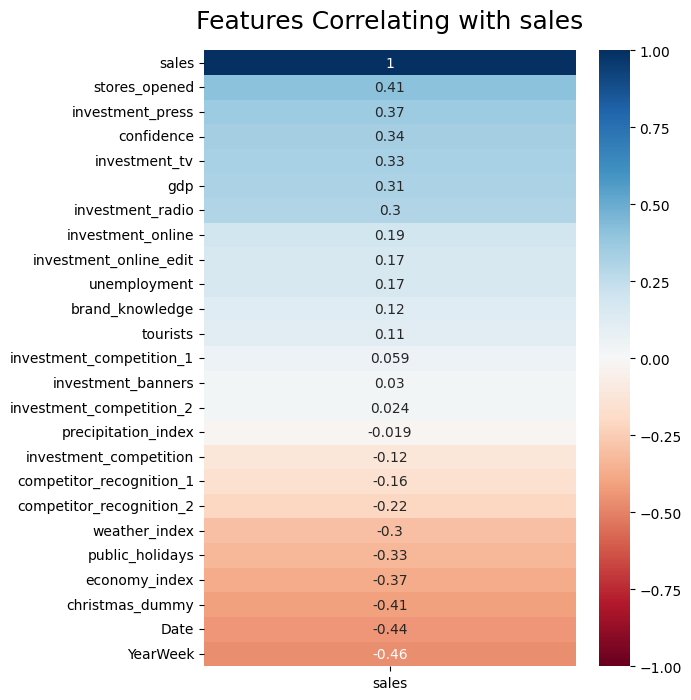

In [776]:
correlation_heatmap_single_col(df=df, col_name='sales')

**Select features**

In [777]:
# define cols for analysis
input_cols =[   'sales',
                'stores_opened',
                'investment_press',
                'confidence', 
                'investment_tv', 
                'gdp',
                'investment_radio', 
                'investment_online',
                'unemployment',
                'brand_knowledge',
                'investment_competition_1',
                'investment_banners', 
                #'tourists',
                #'investment_competition',
                #'investment_competition_2',
                #'competitor_recognition_1',
                #'competitor_recognition_2',
                #'precipitation_index',
                'weather_index',
                'public_holidays',
                'economy_index',
                'christmas_dummy'
                ]


**Conclusion: Pre-select features**

In [778]:
''' 
Conclusion:
- the features with the highest and lowest correlated features were chosen apart from 'date' and 'YearWeek'. 

'''

" \nConclusion:\n- the features with the highest and lowest correlated features were chosen apart from 'date' and 'YearWeek'. \n\n"

# 4. Scale

In [779]:
# Scale the features in CZK 
invest_cols = ['investment_tv',	
               'investment_radio',	
               'investment_press',	
               'investment_banners',
               'investment_online',
               'investment_competition',
               'investment_competition_1',
               'investment_competition_2',
               'sales'
               ]

df[invest_cols] = df[invest_cols]/1000
df.head(2)

,Date,investment_tv,investment_radio,investment_press,investment_banners,investment_online,stores_opened,economy_index,investment_competition,public_holidays,...,precipitation_index,competitor_recognition_1,competitor_recognition_2,YearWeek,sales,investment_online_edit,unemployment,tourists,gdp,confidence
0,2020-10-01,981.309627,0.0,236.646243,0.0,871.248694,186,22777.0,64.817,0,...,29.957143,0.428392,0.439821,201740,28225.18915,871248.6945,3.601064,926941.000000,0.635931,114.031803
1,2020-10-08,1204.435829,0.0,492.336787,0.0,780.996437,186,22905.3,290.340,0,...,7.314286,0.396890,0.511645,201741,33173.11086,780996.4369,3.578243,872241.193548,0.635931,114.395149


In [780]:
'''
CONCLUSION:

If I scale the data the coefficients will be scaled as well -> must be taken into account when interpereting the coefficients. 
I scaled only features in CZK - better interpretation but the values will be in thousands of CZK - must be considered in during interpretation!!!

'''

'\nCONCLUSION:\n\nIf I scale the data the coefficients will be scaled as well -> must be taken into account when interpereting the coefficients. \nI scaled only features in CZK - better interpretation but the values will be in thousands of CZK - must be considered in during interpretation!!!\n\n'

# 5. Prepare dataset

In [781]:
# Define true values of 'sales'
y = df[['sales']].copy()

# Copy selected variables
X = df[input_cols].drop(columns='sales').copy()

# Add unit vector (interception in line equation)
X['unit vector'] = 1


# 6. DM - Diminishing Return

In [782]:
''' 
I moved the diminishing return chapter below.

'''

' \nI moved the diminishing return chapter below.\n\n'

# 7. Build model - OLS

In [783]:
""" # Calculate coefficients using OLS: gamma = (X^T · X)^-1 · X^T · y
def coeff_fn(X, y):
    XTX_inv = np.linalg.inv(X.T.dot(X))
    XTy = X.T.dot(y)
    gamma = XTX_inv.dot(XTy)
    return gamma

# Call the function
gamma = coeff_fn(X, y) # alternative: coefficients = model.params """

' # Calculate coefficients using OLS: gamma = (X^T · X)^-1 · X^T · y\ndef coeff_fn(X, y):\n    XTX_inv = np.linalg.inv(X.T.dot(X))\n    XTy = X.T.dot(y)\n    gamma = XTX_inv.dot(XTy)\n    return gamma\n\n# Call the function\ngamma = coeff_fn(X, y) # alternative: coefficients = model.params '

In [784]:
# Calculate coefficients:
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     18.41
Date:                Thu, 23 May 2024   Prob (F-statistic):           1.76e-22
Time:                        10:23:07   Log-Likelihood:                -1009.8
No. Observations:                 117   AIC:                             2052.
Df Residuals:                     101   BIC:                             2096.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
stores_opened           

**Multicolinearity-VIF**

In [785]:
# Compute the vif for all given features - values around 1 are considered Ok
def compute_vif(df):  
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [786]:
# Compute VIF 
compute_vif(X).sort_values('VIF', ascending=False)

,Variable,VIF
15,unit vector,5796.129166
0,stores_opened,24.741500
7,unemployment,9.950902
2,confidence,7.902236
13,economy_index,2.573216
4,gdp,2.508221
14,christmas_dummy,2.321622
12,public_holidays,2.142561
11,weather_index,1.885258
9,investment_competition_1,1.609376


**Multicolinerity - Corellation Matrix**

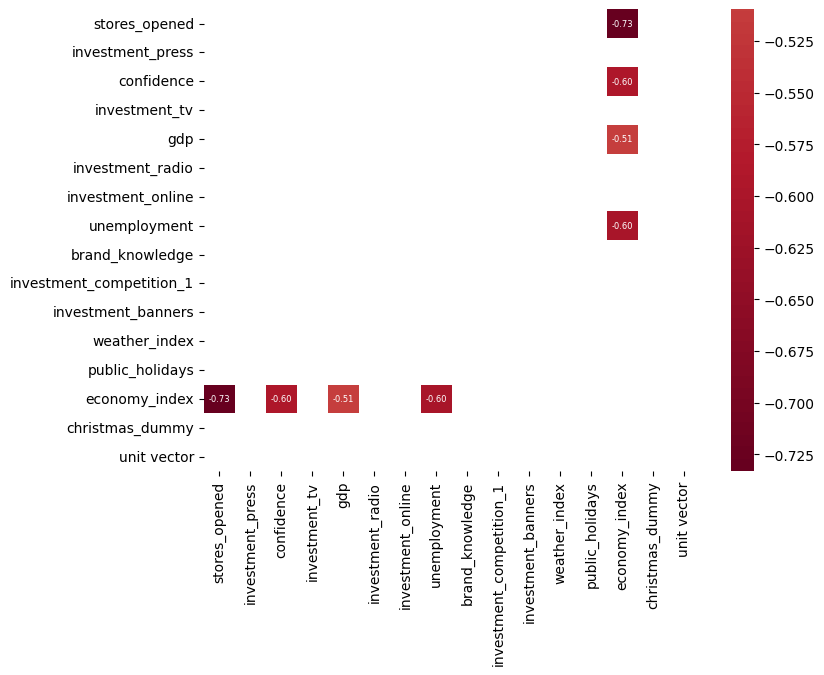

In [787]:
# Check for NEGATIVE high correlations
mask = X.corr() >= -0.5

plt.figure(figsize=(8,6))
sns.heatmap(X.corr(), 
            cmap='RdBu', 
            center=0, 
            annot_kws={"size":6}, 
            annot=True, 
            fmt=".2f",
            mask=mask)

plt.show()

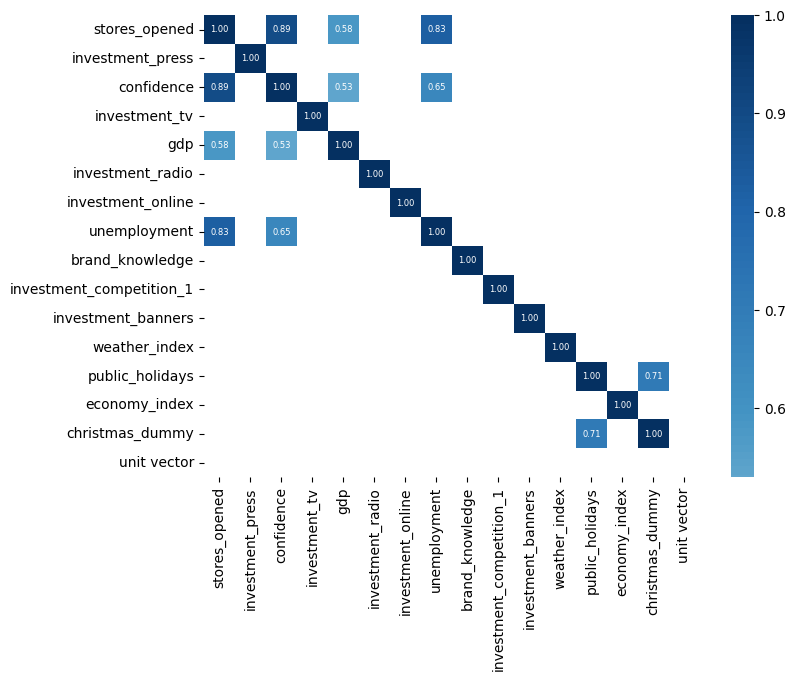

In [788]:
# Check for POSITIVE high correlations
mask = X.corr() <= 0.5

plt.figure(figsize=(8,6))
sns.heatmap(X.corr(), 
            cmap='RdBu', 
            center=0, 
            annot_kws={"size":6}, 
            annot=True, 
            fmt=".2f",
            mask=mask)

plt.show()

**Multicolinearity - centering the continuous variables**

In [789]:
""" # Centering helps to improve multicolinearity = better interpretation, coeff unchanged if they are not divided by std

# Define continuous varianles
cols_cont =      [  'investment_tv', 
                    'investment_radio', 
                    'investment_press', 
                    'investment_banners', 
                    'investment_online']

# Centerize continuous variables
for col in cols_cont:
    mean = X[col].mean()
    X[col] = X[col] - mean

# Run OLS
model = sm.OLS(y, X).fit()

# Compute vif 
vif = compute_vif(X).sort_values('VIF', ascending=False)

print(model.summary())
print(vif) """

" # Centering helps to improve multicolinearity = better interpretation, coeff unchanged if they are not divided by std\n\n# Define continuous varianles\ncols_cont =      [  'investment_tv', \n                    'investment_radio', \n                    'investment_press', \n                    'investment_banners', \n                    'investment_online']\n\n# Centerize continuous variables\nfor col in cols_cont:\n    mean = X[col].mean()\n    X[col] = X[col] - mean\n\n# Run OLS\nmodel = sm.OLS(y, X).fit()\n\n# Compute vif \nvif = compute_vif(X).sort_values('VIF', ascending=False)\n\nprint(model.summary())\nprint(vif) "

**Run again without some features causing multicolinearity**

In [790]:
# Drop some features to get the better F-value (statisticall significance) 
X = X.drop(columns=([ 
                     'unemployment', 
                     'public_holidays',
                     'economy_index',
                     'gdp',
                     'confidence',
                     'investment_competition_1',
                     'investment_radio',
                     ]))

# Run OLS
model = sm.OLS(y, X).fit()
y_pred = model.predict(X)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     31.37
Date:                Thu, 23 May 2024   Prob (F-statistic):           6.99e-25
Time:                        10:23:08   Log-Likelihood:                -1016.7
No. Observations:                 117   AIC:                             2051.
Df Residuals:                     108   BIC:                             2076.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
stores_opened         77.3181      9

In [791]:
# Compute VIF 
compute_vif(X).sort_values('VIF', ascending=False)

,Variable,VIF
8,unit vector,581.300829
0,stores_opened,1.329975
3,investment_online,1.316339
1,investment_press,1.296054
4,brand_knowledge,1.255052
5,investment_banners,1.187192
6,weather_index,1.180723
2,investment_tv,1.125805
7,christmas_dummy,1.068744


In [792]:
''' 
CONCLUSION:
    - from the correlation matrix is possible to see the multicolinearity between the features: 
        - 'stores opened' and 'economy_index' 
            ---> dropped 'economy_index' because of lower correlation with 'sales'

        - 'christmas_dummy' and 'public_holidays' 
            ---> 'public_holidays' dropped because of lower correlation with 'sales'

        - 'stores opened' and 'confidence', 'gdp', 'unemploynment', 'confidence'
            ---> dropped all of them because of lower correlation with 'sales'

    - further were dropped other features which werent statistically significant P-value > 0.05
        
    - after dropping features with high corerelation the VIF has improved for all remaining features and R2 score adjuste did not change significantelly 
    and Cond. No. (expressing multicolinearity) has decreased as well 

    - feature 'investment_radio' was dropped as well is it has high P-value and just 4 data points which is not enough 
    (also after dropping the radio the coeff for online investment  and press investment has increased which makes more sense in terms of fashion industry)
'''

" \nCONCLUSION:\n    - from the correlation matrix is possible to see the multicolinearity between the features: \n        - 'stores opened' and 'economy_index' \n            ---> dropped 'economy_index' because of lower correlation with 'sales'\n\n        - 'christmas_dummy' and 'public_holidays' \n            ---> 'public_holidays' dropped because of lower correlation with 'sales'\n\n        - 'stores opened' and 'confidence', 'gdp', 'unemploynment', 'confidence'\n            ---> dropped all of them because of lower correlation with 'sales'\n\n    - further were dropped other features which werent statistically significant P-value > 0.05\n        \n    - after dropping features with high corerelation the VIF has improved for all remaining features and R2 score adjuste did not change significantelly \n    and Cond. No. (expressing multicolinearity) has decreased as well \n\n    - feature 'investment_radio' was dropped as well is it has high P-value and just 4 data points which is not

# add 6. DR - Diminishing return

**Add quadratic elements to the investments features**

In [793]:
# Define the function
def add_squared_columns(df, columns_list):
    for col in columns_list:
        new_col_name = f"{col}_sqrt"
        df[new_col_name] = df[col]**2
    return df

In [794]:
# Define the features with square element
columns_to_square = ['investment_press', 
                     'investment_tv', 
                     'investment_online', 
                     #'investment_radio', 
                     #'investment_banners'
                    ]

X_dr = X.copy()
X_dr = add_squared_columns(X_dr, columns_to_square).copy()
X_dr.head(2)

,stores_opened,investment_press,investment_tv,investment_online,brand_knowledge,investment_banners,weather_index,christmas_dummy,unit vector,investment_press_sqrt,investment_tv_sqrt,investment_online_sqrt
0,186,236.646243,981.309627,871.248694,0.724231,0.0,71.050000,0,1,56001.444184,9.629686e+05,759074.287668
1,186,492.336787,1204.435829,780.996437,0.810316,0.0,54.744286,0,1,242395.512030,1.450666e+06,609955.434450


**Run OLS with DM**

In [795]:
# Run OLS
model_dr = sm.OLS(y, X_dr).fit()
y_pred_dr = model_dr.predict(X_dr)
print(model_dr.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     27.69
Date:                Thu, 23 May 2024   Prob (F-statistic):           3.31e-26
Time:                        10:23:08   Log-Likelihood:                -1007.3
No. Observations:                 117   AIC:                             2039.
Df Residuals:                     105   BIC:                             2072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
stores_opened             89

**Run OLS with DR again with removed coefficients**

In [796]:
# columns to drop

X_dr = X_dr.drop([#'investment_banners_sqrt',
                  'investment_tv_sqrt'], axis=1)


In [797]:
# Run OLS
model_dr = sm.OLS(y, X_dr).fit()
y_pred_dr = model_dr.predict(X_dr)
print(model_dr.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     30.61
Date:                Thu, 23 May 2024   Prob (F-statistic):           6.90e-27
Time:                        10:23:08   Log-Likelihood:                -1007.5
No. Observations:                 117   AIC:                             2037.
Df Residuals:                     106   BIC:                             2067.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
stores_opened             88

**Conclusion: dimnishing return**

In [798]:
''' 
CONCLUSION:
 - one of the common methods to implement diminishing return into a equation is to add quadratic element for the investment variable (in case of )

 - RADIO feature wasn't included as it had been droped before due to not beeing statistically significant

 - after running OLS with DR the TV and banners quadratic coefficients were removed as they were found statistically not significant 
    - which confirms the visual results in EDA section where scatter plot revealed that linear realationship with sales is possible
'''

" \nCONCLUSION:\n - one of the common methods to implement diminishing return into a equation is to add quadratic element for the investment variable (in case of )\n\n - RADIO feature wasn't included as it had been droped before due to not beeing statistically significant\n\n - after running OLS with DR the TV and banners quadratic coefficients were removed as they were found statistically not significant \n    - which confirms the visual results in EDA section where scatter plot revealed that linear realationship with sales is possible\n"

# Interpret Coefficients

In [799]:
''' 
CONCLUSION:

- during the coeff verification we expect that other values will stay unchanged = 'ceteris paribus'

        - if 1 store is opened it will increase the sales by ≈ 89*1000 = 89.000 CZK, 'ceteris paribus' 
                --> economic interpretation and verification of the coeff. is OK

        - if 'BRAND KNOWLEDGE' is increased by 0.1 the sales rises up to 0.9 mil CZK, 'ceteris paribus' 
                --> economic interpretation and verification of the coeff. is OK

        - if 'weather index' is increased by 10 the sales drops by 1 mil CZK, 'ceteris paribus' 
                --> economic interpretation and verification of the coeff. is OK

        - if Christmas Eve is = 1 then the sales drops by 5.4 mil CZK, 'ceteris paribus', 
                --> (all stores are closed) economic interpretation and verification of the coeff. is OK

        - 'interception-unit vector' if all values are zero then the sales is 5.7 millions, which is hard to believe :-(
                --> probably there is a explanation for that - but I don't know about it :-(


        - for investments in channels i dropped quadratic elements for BANNERS and TV as they were found not to be statistically significant:

                - if one thousand (1k) is invested in TV commercial, then sales is increased by 1.4*1*1000 ≈ 1400 CZK, 'ceteris paribus' 
                        --> economic interpretation and verification of the coeff. is OK

                - if one thousand (1k) is invested in PRESS commercial, then sales is increased by 4.4*1*1000 ≈ 4400 CZK, 'ceteris paribus' 
                        --> economic interpretation and verification of the coeff. is OK

                - if one thousand (1k) is invested in ONLINE commercial, then sales is increased by 3.4*1*1000 ≈ 3400 CZK, 'ceteris paribus' 
                        --> economic interpretation and verification of the coeff. is OK

                - if one thousand (1k) is invested in BANNERS, then sales is increased by 3.5*1*1000 ≈ 3500 CZK, 'ceteris paribus' 
                        --> economic interpretation and verification of the coeff. is OK

All investments in TV, banners, online, and press make sense in terms of the clothing business 
        - fashion is visual that is why removing radio channel makes sense as this channel is not visual and not visually descriptive as remaining channels                  


'''

" \nCONCLUSION:\n\n- during the coeff verification we expect that other values will stay unchanged = 'ceteris paribus'\n\n        - if 1 store is opened it will increase the sales by ≈ 89*1000 = 89.000 CZK, 'ceteris paribus' \n                --> economic interpretation and verification of the coeff. is OK\n\n        - if 'BRAND KNOWLEDGE' is increased by 0.1 the sales rises up to 0.9 mil CZK, 'ceteris paribus' \n                --> economic interpretation and verification of the coeff. is OK\n\n        - if 'weather index' is increased by 10 the sales drops by 1 mil CZK, 'ceteris paribus' \n                --> economic interpretation and verification of the coeff. is OK\n\n        - if Christmas Eve is = 1 then the sales drops by 5.4 mil CZK, 'ceteris paribus', \n                --> (all stores are closed) economic interpretation and verification of the coeff. is OK\n\n        - 'interception-unit vector' if all values are zero then the sales is 5.7 millions, which is hard to believe 

# 9. Validation

**Plot the chart**

In [800]:
# Add base prediction without DR
df_results=pd.DataFrame()

df_results['sales'] = y
df_results['sales_pred'] = y_pred
df_results['sales_pred_dr'] = y_pred_dr

In [801]:
# Plot the chart
fig = px.line(df_results,
              y=['sales', 'sales_pred', 'sales_pred_dr'], 
              title='True vs predicted sales with and without DR',
              height=700,
              width=1200
              )
fig.show()

**Calculate MAPE**

In [802]:
def mape(y, y_pred):
    mape = (mean_absolute_percentage_error(np.array(y), np.array(y_pred)) * 100).round(2)
    print (f'MAPE: {mape} %')

In [803]:
# Without DR
mape(y=y,
     y_pred=y_pred
     )

# With DR
mape(y=y,
     y_pred=y_pred_dr
     )

MAPE: 4.63 %
MAPE: 4.23 %


**Calculate R^2(adjusted) = corrected goodness-of-fit**

In [804]:
def r2_adj(model):
    r2_adj = model.rsquared_adj.round(2)*100
    print (f'R2-adj: {r2_adj} %')

In [805]:
r2_adj(model)
r2_adj(model_dr)

R2-adj: 68.0 %
R2-adj: 72.0 %


**Heterosquedasticity x Homosquedasticity check**

In [806]:
def standartize_residuals(model):
    
    # Center the residuals
    res = np.array(model.resid)
    res_cent = res - np.mean(res)

    # Standardize the residuals
    res_std = res_cent / np.std(res)
    return res_std

In [807]:
# Add a column with std values
df_results['res_std_dr'] = standartize_residuals(model_dr)

In [808]:
# Plot the chart
fig = px.scatter(df_results,
                 y='res_std_dr',
                 x='sales_pred_dr',
                 width=1000,
                 height=600
                 )

# Add a horizontal line at y=0
fig.add_hline(y=0, line_dash="dot", line_color="red")
fig.show()

**Mathematical verification**

In [809]:
def maths_verification(model, X, y):

    # Calculate the averages
    cols_mean_sqrt = np.array(X.mean().tolist())

    # Retreive the coeffs
    coeff_sqrt = np.array(model.params)

    # Retreive residuals and make average
    res_mean_sqrt = model.resid.mean()

    # Right side of the equation
    right = (np.dot(cols_mean_sqrt, coeff_sqrt) + res_mean_sqrt).round(2)

    # Left side of the equation
    left = y.mean().values[0].round(2)

    print(f'RIGHT side of the equation: {right}')
    print(f'LEFT side of the equation: {left}')


In [810]:
maths_verification(model_dr, X_dr, y)

RIGHT side of the equation: 24716.29
LEFT side of the equation: 24716.29


**Conclusion: Verification**

In [811]:
'''
 - plotting the predicted values and comparing them with the true values of sales revealed that the predicted values are not far from the true ones

 - comparing MAPE and R2(adjusted) between version with and without DR shows that implementing DR into the model improved the accuracy (even r2(adjusted) is not the best - about 70% )

- also checking the residuals for hetersqudascity (needed assumption for sucessfull regression) finished well - no heterosquedascity

- in the end the sucefull mathematical verification was done as well (mean values at the left and right side of the equation is equal)

'''

'\n - plotting the predicted values and comparing them with the true values of sales revealed that the predicted values are not far from the true ones\n\n - comparing MAPE and R2(adjusted) between version with and without DR shows that implementing DR into the model improved the accuracy (even r2(adjusted) is not the best - about 70% )\n\n- also checking the residuals for hetersqudascity (needed assumption for sucessfull regression) finished well - no heterosquedascity\n\n- in the end the sucefull mathematical verification was done as well (mean values at the left and right side of the equation is equal)\n\n'

# 10. Answering customer's question

In [812]:
df_week

,Date,investment_tv,investment_radio,investment_press,investment_banners,investment_online,stores_opened,economy_index,investment_competition,public_holidays,...,christmas_dummy,weather_index,investment_competition_1,investment_competition_2,precipitation_index,competitor_recognition_1,competitor_recognition_2,YearWeek,sales,investment_online_edit
0,2020-10-01,9.813096e+05,0.0,236646.24270,0.0000,8.712487e+05,186,22777.0,6.481700e+04,0,...,0,71.050000,4.469290e+06,1.646746e+07,29.957143,0.428392,0.439821,201740,28225189.15,8.712487e+05
1,2020-10-08,1.204436e+06,0.0,492336.78720,0.0000,7.809964e+05,186,22905.3,2.903400e+05,0,...,0,54.744286,3.424972e+06,9.855486e+06,7.314286,0.396890,0.511645,201741,33173110.86,7.809964e+05
2,2020-10-15,1.321570e+06,0.0,291885.33780,0.0000,9.321739e+05,186,23328.8,8.249410e+05,0,...,0,54.311429,1.502713e+07,1.812631e+07,9.500000,0.440410,0.394800,201742,30504393.42,9.321739e+05
3,2020-10-22,2.155215e+05,0.0,110500.83200,0.0000,6.830815e+05,186,23485.3,5.912910e+05,1,...,0,68.302857,1.147109e+07,1.579170e+07,30.485714,0.404397,0.413794,201743,30335675.45,6.830815e+05
4,2020-10-29,9.799192e+04,0.0,58135.35929,175435.8015,5.398485e+05,186,23557.1,5.548889e+05,0,...,0,63.864286,1.876094e+07,2.324122e+07,19.728571,0.500315,0.452294,201744,25670890.36,5.398485e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2022-11-24,0.000000e+00,0.0,0.00000,26600.5635,2.018774e+06,142,28175.0,1.746902e+07,0,...,0,65.965714,8.383346e+06,2.238505e+07,19.100000,0.552689,0.471849,201948,23974410.26,2.018774e+06
113,2022-12-01,0.000000e+00,0.0,0.00000,0.0000,9.954599e+05,142,28109.8,1.213155e+07,0,...,0,67.607143,3.788888e+06,2.804611e+07,11.242857,0.501246,0.500979,201949,20884279.92,9.954599e+05
114,2022-12-08,0.000000e+00,0.0,0.00000,0.0000,1.652220e+06,142,28290.7,2.062479e+07,0,...,0,71.281429,5.688530e+06,2.757024e+07,13.071429,0.493944,0.444787,201950,21475590.81,1.652220e+06
115,2022-12-15,0.000000e+00,0.0,0.00000,0.0000,9.946260e+05,142,28608.6,2.044941e+07,0,...,0,63.042857,4.501810e+06,2.807243e+07,11.057143,0.524342,0.505004,201951,23863407.52,9.946260e+05


**Current customer's investments**

In [813]:
invest_total = (df_week[['investment_tv', 'investment_online', 'investment_banners', 'investment_radio', 'investment_press']]/1000000).sum().round(2).sort_values(ascending=False)

invest_total_df = pd.DataFrame({
    'channel': invest_total.index,
    'total': invest_total.values
})

invest_total_df

,channel,total
0,investment_online,67.33
1,investment_tv,38.93
2,investment_press,12.83
3,investment_banners,6.56
4,investment_radio,0.58


In [814]:
invest_total_df['total'].sum()

126.22999999999999

In [815]:
invest_total_df['percentage'] = ((invest_total_df['total']/(invest_total_df['total'].sum()))*100).round(2)
invest_total_df

,channel,total,percentage
0,investment_online,67.33,53.34
1,investment_tv,38.93,30.84
2,investment_press,12.83,10.16
3,investment_banners,6.56,5.20
4,investment_radio,0.58,0.46


**Conclusion: Answering customer's question**

In [816]:
''' 
A few slides in PowerPoint are dedicated to this topic.

'''

' \nA few slides in PowerPoint are dedicated to this topic.\n\n'

# 11. Compare efficiency

**Calculate the diminishing point for different channels**

In [817]:
# Create df
df_invest = pd.DataFrame({'coeff': model_dr.params})

# Get the column names I want to keep
investment_cols = ['investment_press', 
                   'investment_online',
                    'investment_press_sqrt',  
                   'investment_online_sqrt',
                   ]  


df_invest = df_invest.loc[investment_cols]
df_invest

,coeff
investment_press,4.427162
investment_online,3.423660
investment_press_sqrt,-0.003755
investment_online_sqrt,-0.000423


In [818]:
n_features = 2

df_invest_new = pd.DataFrame()

df_invest_new['beta-1'] = df_invest.head(n_features)

col2 = np.array(df_invest.tail(n_features))

df_invest_new['beta-2'] = col2

df_invest_new

,beta-1,beta-2
investment_press,4.427162,-0.003755
investment_online,3.423660,-0.000423


In [819]:
# Calculate Diminishing points 

# first derivation: dy/dx1 = (beta1*x1 + beta2*x1^2)/dx => x = beta1/(-2*beta2)
# second derivation: dy^2/dx1^2 => 2*beta2 

    # if beta2>0 - there is no diminishing point as the function is CONVEX
    # if beta2<0 - there is diminishing point as the function is CONCAVE

df_invest_new['dim_point'] = df_invest_new['beta-1']/(-2*df_invest_new['beta-2'])
df_invest_new

,beta-1,beta-2,dim_point
investment_press,4.427162,-0.003755,589.558731
investment_online,3.423660,-0.000423,4050.129820


In [820]:
# Calculate max sales for Diminishing point
df_invest_new['max_sales'] = df_invest_new['beta-1']*df_invest_new['dim_point'] + df_invest_new['beta-2']*df_invest_new['dim_point']**2
df_invest_new

,beta-1,beta-2,dim_point,max_sales
investment_press,4.427162,-0.003755,589.558731,1305.036094
investment_online,3.423660,-0.000423,4050.129820,6933.133781


**Compute the efficiency for channels with DR**

In [821]:
def return_of_investment(df, roi_col_name, eff_col_name, invest_col_name, profit_col_name):
    df[roi_col_name] = (((df[profit_col_name] - df[invest_col_name])/df[invest_col_name])*100).round(2)
    df[eff_col_name] =  df[roi_col_name]+100

In [822]:
# Calculate ROI and efficiency 

return_of_investment(df=df_invest_new, 
                     roi_col_name='ROI', 
                     eff_col_name='Efficiency',
                     invest_col_name='dim_point', 
                     profit_col_name='max_sales'
                     )

df_invest_new

,beta-1,beta-2,dim_point,max_sales,ROI,Efficiency
investment_press,4.427162,-0.003755,589.558731,1305.036094,121.36,221.36
investment_online,3.423660,-0.000423,4050.129820,6933.133781,71.18,171.18


**Compute the efficiency for channels without DR**

In [837]:
df_invest_no_dr = pd.DataFrame()

df_invest_no_dr.loc['investment_tv', 'beta'] = model_dr.params.loc['investment_tv']
df_invest_no_dr.loc['investment_banners', 'beta'] = model_dr.params.loc['investment_banners']

df_invest_no_dr['invested_value'] = 100

df_invest_no_dr['profit'] = df_invest_no_dr['beta']*df_invest_no_dr['invested_value'] 

In [838]:
return_of_investment(df=df_invest_no_dr, 
                     roi_col_name='ROI', 
                     eff_col_name='Efficiency',
                     invest_col_name='invested_value', 
                     profit_col_name='profit'
                     )

df_invest_no_dr

,beta,invested_value,profit,ROI,Efficiency
investment_tv,1.339008,100,133.900830,33.90,133.90
investment_banners,3.445362,100,344.536227,244.54,344.54


**Conclusion: Efficiency**

In [825]:
''' 
First derivative gave me the information about the diminishing point.

Second derivative gave me information if the function is Convex Or Concave ('investment_online' and 'investment_press' were Concave - quadratic element is negative).

Net profit - ROI (Return Of Investment) for channels with DR were calculated for max investments=diminishing points. 
Net profit - ROI (Return Of Investment) for channels without DR were calculated for an investment 100k CZK . 
ROI values for channels:
                        - banners 244%
                        - press 121%
                        - online 71%
                        - TV 34%

The highest ROI have banners - could be explained by the fact that compared to other channels:
    - the producton costs are reltively low
    - they can be visible 24/7  
    - they can be long lasting 
    - they can be versatile - used in various settings
Banners ROI is quite surprising - based on the scatter plot in EDA section where the slope of the regression line was quite low and the correlation with sales was low as well.


Online and TV has the lowest ROI - that's because it is expensive nowadays to pay space on internet and TV.
Press has ROI 121% - again it is fashion and it is visual so i can imagine that many printed stuff like catalogs, etc. are needed, I also suppose that is much cheaper than online or TV

'''

" \nFirst derivative gave me the information about the diminishing point.\n\nSecond derivative gave me information if the function is Convex Or Concave ('investment_online' and 'investment_press' were Concave - quadratic element is negative).\n\nNet profit - ROI (Return Of Investment) for channels with DR were calculated for max investments=diminishing points. \nNet profit - ROI (Return Of Investment) for channels without DR were calculated for an investment 100k CZK . \nROI values for channels:\n                        - banners 244%\n                        - press 121%\n                        - online 71%\n                        - TV 34%\n\nThe highest ROI have banners - could be explained by the fact that compared to other channels:\n    - the producton costs are reltively low\n    - they can be visible 24/7  \n    - they can be long lasting \n    - they can be versatile - used in various settings\nBanners ROI is quite surprising - based on the scatter plot in EDA section where t

# 12. Marketing Mix - Diminishing return and Adstock

**Calculate Adstock**

In [826]:
# Copy variables
X_base = X.copy()

# Copy true values of 'sales'
y_base = y.copy()


In [827]:
'''

Adstock: A(t) = x(t) + A(t-1)*beta

Diminishing return: DR = A(t)^alfa

'''

# Function for Adstocked variables
def adstock(x, beta):
    return tsa.filters.recursive_filter(x, beta)

# Function for Diminishing return
def dr(x, alfa):
    return x ** alfa

In [828]:
# Loop through all combinations of beta and alfa
def optimizing_function(beta_tv, alfa_tv, 
                        beta_press, alfa_press, 
                        beta_online, alfa_online,
                        #beta_radio, alfa_radio,
                        beta_banners, alfa_banners,
                        ):

    new_X = {}
    
    # Add Diminishing returns
    new_X['tv_spend'] = dr(adstock(X_base['investment_tv'], beta=beta_tv), alfa=alfa_tv)
    new_X['press_spend'] = dr(adstock(X_base['investment_press'], beta=beta_press), alfa=alfa_press)
    new_X['online_spend'] = dr(adstock(X_base['investment_online'], beta=beta_online), alfa=alfa_online)
    #new_X['radio_spend'] = dr(adstock(X_base['investment_radio'], beta=beta_radio), alfa=alfa_radio)
    new_X['banners_spend'] = dr(adstock(X_base['investment_banners'], beta=beta_banners), alfa=alfa_banners)

    # Create new DataFrame
    df_new = pd.DataFrame.from_dict(new_X)
    df_new = pd.concat([X_base, df_new], axis=1)

    # Drop original sales
    df_new = df_new.drop(['investment_tv', 
                          'investment_online', 
                          'investment_press', 
                          #'investment_radio', 
                          'investment_banners'
                          ], axis=1)
   



    # Compute coefficients
    model_mm = sm.OLS(y_base, df_new).fit()
    coeff_mm =model_mm.params

    # Add calculated sales
    df_new['sales_pred'] = np.dot(df_new, coeff_mm)

    # Add true value
    df_new['sales'] = y_base['sales'].copy()

    # Calculate MAPE
    mape = (mean_absolute_percentage_error(y_base['sales'], df_new['sales_pred']) * 100).round(2)

    return mape

In [829]:
# Define the list of hyperparameters to optimize
instrum = ng.p.Instrumentation(

    # Define boundaries of the optimized variables
    beta_tv = ng.p.Scalar(lower=0, upper=1),
    alfa_tv = ng.p.Scalar(lower=0, upper=1),
    
    alfa_press = ng.p.Scalar(lower=0, upper=1),
    beta_press = ng.p.Scalar(lower=0, upper=1),

    alfa_online = ng.p.Scalar(lower=0, upper=1),
    beta_online = ng.p.Scalar(lower=0, upper=1),

    #alfa_radio = ng.p.Scalar(lower=0, upper=1),
    #beta_radio = ng.p.Scalar(lower=0, upper=1),

    alfa_banners = ng.p.Scalar(lower=0, upper=1),
    beta_banners = ng.p.Scalar(lower=0, upper=1)
)

In [830]:
# Set up the optimizer
optimizer = ng.optimizers.NGOpt(parametrization=instrum, budget=2500)

# Run the optimizer
recommendation = optimizer.minimize(optimizing_function)

In [831]:
# Retreive the best values into a dictionary
best_params = recommendation.value[1]

best_params

{'beta_tv': 0.5782968401908875,
 'alfa_tv': 0.9995347857475281,
 'alfa_press': 0.37431427836418146,
 'beta_press': 0.9999997615814209,
 'alfa_online': 0.0014151375507935884,
 'beta_online': 0.0004975465126335622,
 'alfa_banners': 0.9999821186065674,
 'beta_banners': 0.6055562496185303}

**Diminishing return - best params**

In [832]:
# Define best params 
alfa_tv = best_params['alfa_tv']
beta_tv = best_params['beta_tv']

alfa_press = best_params['alfa_press']
beta_press = best_params['beta_press']

alfa_online = best_params['alfa_online']
beta_online = best_params['beta_online']

""" alfa_radio = best_params['alfa_radio']
beta_radio = best_params['beta_radio'] """

alfa_banners = best_params['alfa_banners']
beta_banners = best_params['beta_banners']

In [833]:
# Run with the best params
new_X = {}
    
# Add Diminishing returns
new_X['tv_spend'] = dr(adstock(X_base['investment_tv'], beta=beta_tv), alfa=alfa_tv)
new_X['press_spend'] = dr(adstock(X_base['investment_press'], beta=beta_press), alfa=alfa_press)
new_X['online_spend'] = dr(adstock(X_base['investment_online'], beta=beta_online), alfa=alfa_online)
#new_X['radio_spend'] = dr(adstock(X_base['investment_radio'], beta=beta_radio), alfa=alfa_radio)
new_X['banners_spend'] = dr(adstock(X_base['investment_banners'], beta=beta_banners), alfa=alfa_banners)

# Create new DataFrame
df_new = pd.DataFrame.from_dict(new_X)
df_new = pd.concat([X_base, df_new], axis=1)

# Drop original sales
df_new = df_new.drop(['investment_tv', 
                      'investment_online', 
                      'investment_press', 
                      #'investment_radio',
                      #'investment_banners'
                      ], axis=1)

# Compute coefficients
model_mm = sm.OLS(y_base, df_new).fit()
coeff_mm =model_mm.params

# Add calculated sales
df_new['sales_pred_mm'] = np.dot(df_new, coeff_mm)

# Add true value
df_new['sales'] = y_base['sales'].copy()

# New df
coeff_best_mm = model_mm.params

# Calculate MAPE
mape = (mean_absolute_percentage_error(y_base['sales'], df_new['sales_pred_mm']) * 100).round(2)

print(f'MAPE: {mape}%')


MAPE: 3.48%


In [834]:
coeff_best_mm

stores_opened         7.036774e+01
brand_knowledge       6.670291e+03
investment_banners   -3.675281e+00
weather_index        -8.615836e+01
christmas_dummy      -5.400146e+03
unit vector          -1.184689e+06
tv_spend              9.108831e-01
press_spend          -1.189880e+02
online_spend          1.190036e+06
banners_spend         3.738254e+00
dtype: float64

**Run and plot with the best params**

In [835]:
fig = px.line(df_new,
              y=['sales', 'sales_pred_mm'], 
              title='True vs predicted sales using Marketing Mix',
              height=700,
              width=1200
              )
fig.show()

**Conclusion: Marketing Mix**

In [836]:
''' 
CONCLUSION:
    - from the chart and from the MAPE value seems to have the best results but the coefficents have changed again.
        - unit vector is negative - which makes more sense if all shops are closed and we don't invest anything in the ads we will loose money 
        pay the rent for stores, salaries for employees

    - However the interpretation coefficients for ads is not straightforward as we usen Add stock and DR equations

'''

" \nCONCLUSION:\n    - from the chart and from the MAPE value seems to have the best results but the coefficents have changed again.\n        - unit vector is negative - which makes more sense if all shops are closed and we don't invest anything in the ads we will loose money \n        pay the rent for stores, salaries for employees\n\n    - However the interpretation coefficients for ads is not straightforward as we usen Add stock and DR equations\n\n"